<center><h1>BMI Predictor</h1></center>
Predict BMI using weights and heights
Ref: https://www.kaggle.com/vishweshsalodkar/body-mass-index

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as lines
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBRegressor

In [2]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'

In [3]:
#Load the input file
df_input = pd.read_excel('BMI.xlsx')

In [4]:
print ("Sample data:")
display(df_input.head())
print (f"shape of dataset:{df_input.shape}\n")
print ("DataSet Summary:\n")
display(df_input.info())

Sample data:


,SR.NO,Height(cm),Weight(in Kg),Age,Gender,BMI
0,1,160,60,26,M,23.4
1,2,165,80,26,M,29.4
2,3,150,55,26,M,24.4
3,4,180,100,26,M,30.9
4,5,165,120,26,M,44.1


shape of dataset:(50, 6)

DataSet Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SR.NO          50 non-null     int64  
 1   Height(cm)     50 non-null     int64  
 2   Weight(in Kg)  50 non-null     int64  
 3   Age            50 non-null     int64  
 4   Gender         50 non-null     object 
 5   BMI            50 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


None

There is no missing values in the features.

In [5]:
df_input.columns

Index(['SR.NO', 'Height(cm)', 'Weight(in Kg)', 'Age', 'Gender', 'BMI'], dtype='object')

In [6]:
#Delete the column SR.NO which doesn't have much value to the target feauture prediction.
df_input.drop('SR.NO',axis=1,inplace=True)

In [7]:
print (f"Unique values in the Gender feature: {df_input.Gender.unique()}")

Unique values in the Gender feature: ['M']


Since there is one constant value present in the Gender feature, it doesn't add much value to the model training.Hence removing this feature.

In [8]:
df_input.drop('Gender',axis=1,inplace=True)

In [9]:
print (f"Unique values in the Age feature : {df_input.Age.unique()}")

Unique values in the Age feature : [26]


Constant value 26 is present in the dataset, which doesn't add much importance to the model training.Hence removing this feature.

In [10]:
df_input.drop('Age',axis=1,inplace=True)

In [11]:
print (f"current dataset sample:\n{df_input.head()}")

current dataset sample:
   Height(cm)  Weight(in Kg)   BMI
0         160             60  23.4
1         165             80  29.4
2         150             55  24.4
3         180            100  30.9
4         165            120  44.1


In [12]:
#Renaming the dependent features
df_input.rename(columns={'Height(cm)':'Height','Weight(in Kg)':'Weight'},inplace=True)

## Feature Analysis

In [13]:
#Categorical feature analysis
def analyze_categorical_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Discrete variable</h4>"))


In [14]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Sample data:\n",fld.head())
    print ("\nNull value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    print (f"\n Skewness : {fld.skew()} \n")
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(fld.name + "-distribution")
    plt.show()
    plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Continuous variable</h4>"))

### 1. Height

Sample data:
 0    160
1    165
2    150
3    180
4    165
Name: Height, dtype: int64

Null value count :  0

 count     50.000000
mean     178.540000
std       24.937645
min      140.000000
25%      155.750000
50%      181.000000
75%      197.750000
max      221.000000
Name: Height, dtype: float64

 Skewness : -0.07724073303815754 



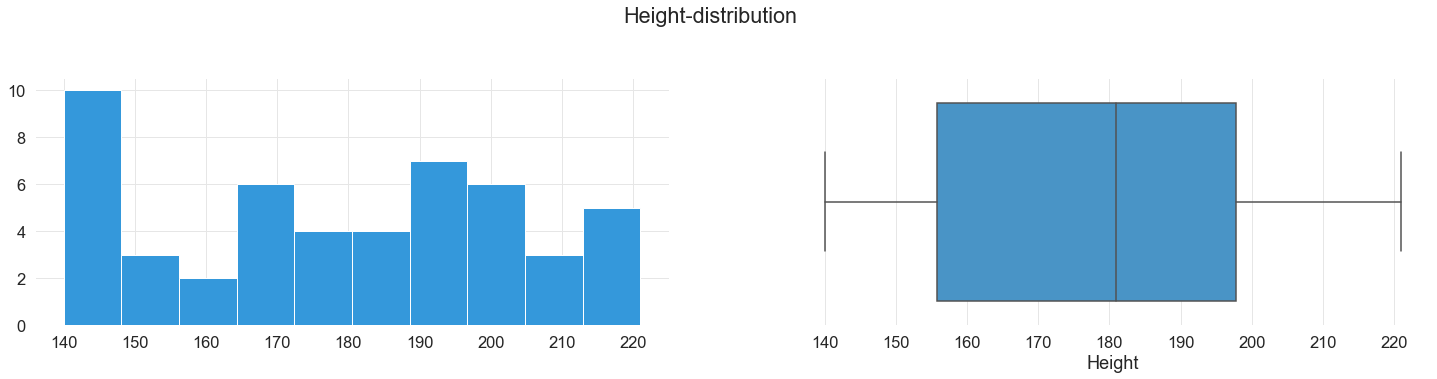

In [15]:
analyze_continuous_feature(df_input.Height)

Height data from the dataset ranges from 140 to 221cm.<br>
People with height less than 150cm is more compared to other heights.


### 2. Weight

Sample data:
 0     60
1     80
2     55
3    100
4    120
Name: Weight, dtype: int64

Null value count :  0

 count     50.00000
mean      90.82000
std       39.92426
min       30.00000
25%       55.25000
50%       84.50000
75%      118.75000
max      180.00000
Name: Weight, dtype: float64

 Skewness : 0.6635875005961636 



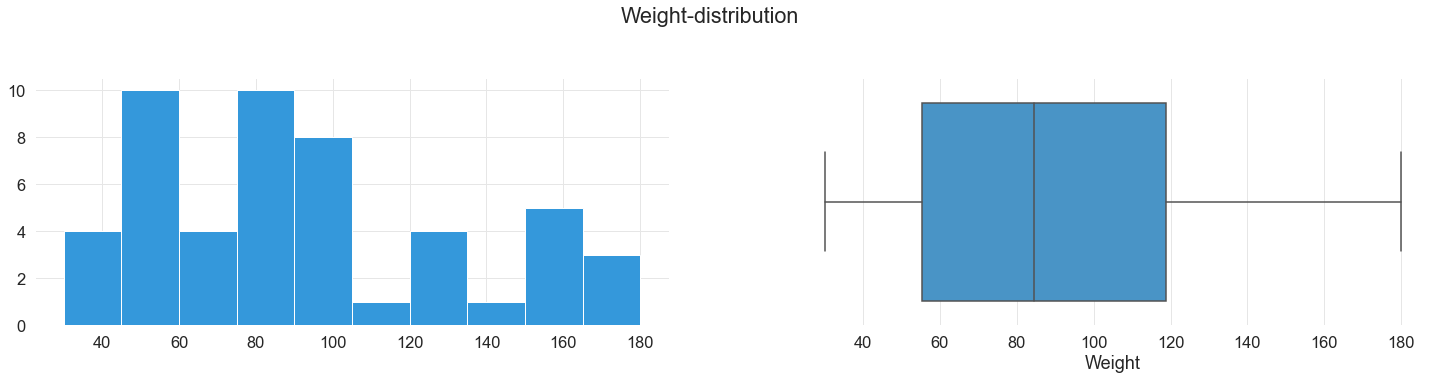

In [16]:
analyze_continuous_feature(df_input.Weight)

Weight data ranges from 30 to 180kg.

### 3. BMI

Sample data:
 0    23.4
1    29.4
2    24.4
3    30.9
4    44.1
Name: BMI, dtype: float64

Null value count :  0

 count    50.00000
mean     27.08000
std       6.35459
min      14.90000
25%      23.82500
50%      25.25000
75%      29.85000
max      45.00000
Name: BMI, dtype: float64

 Skewness : 1.0702496474804672 



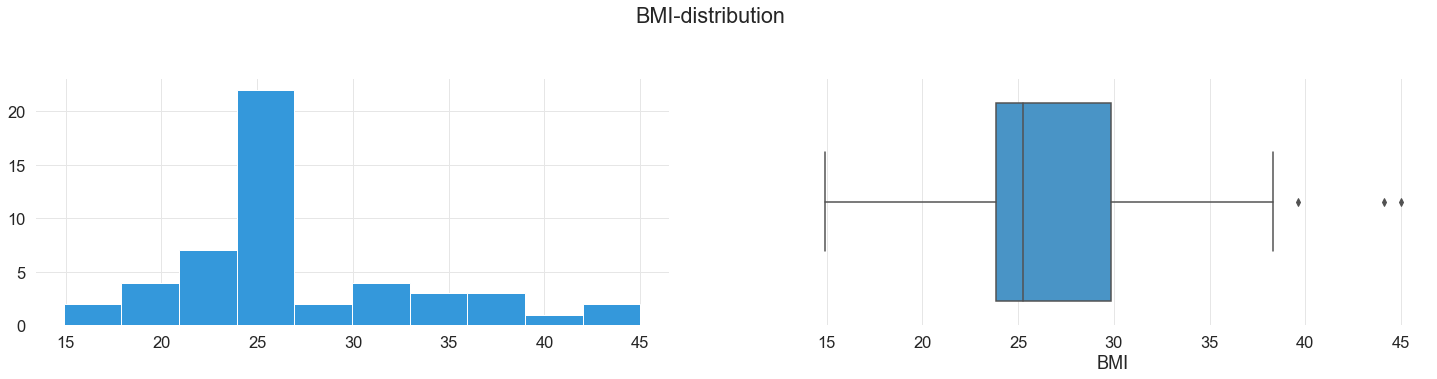

In [17]:
analyze_continuous_feature(df_input.BMI)

BMI values ranges from 14.9 to 45.00

## Feature Relationships

### 1. Height and Weight

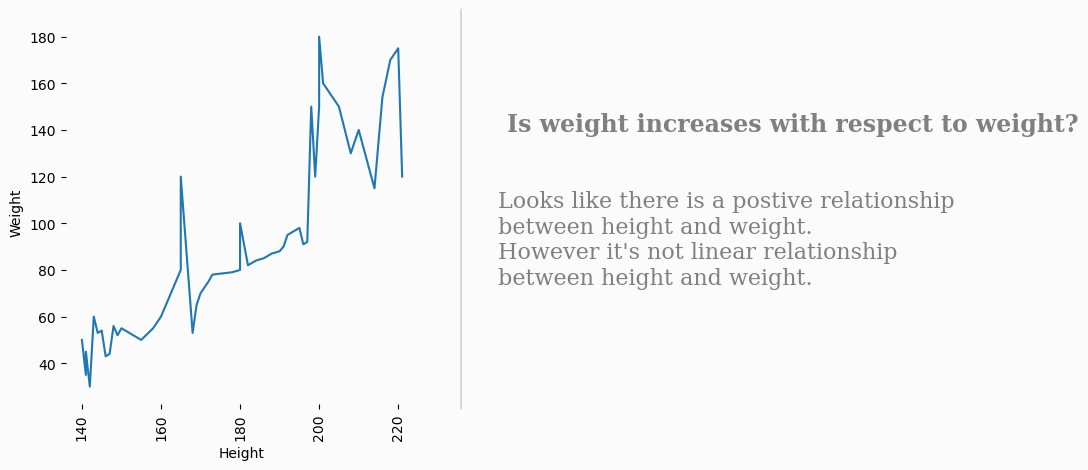

In [18]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.lineplot(data=df_input, x = 'Height', y='Weight',estimator=None,ax=ax0)

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Is weight increases with respect to weight?
        ''')
#text content
fig.text(x=0.5,
        y=0.3,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Looks like there is a postive relationship 
        between height and weight.
        However it's not linear relationship 
        between height and weight.
        ''')
plt.show()

## 2. Height and BMI

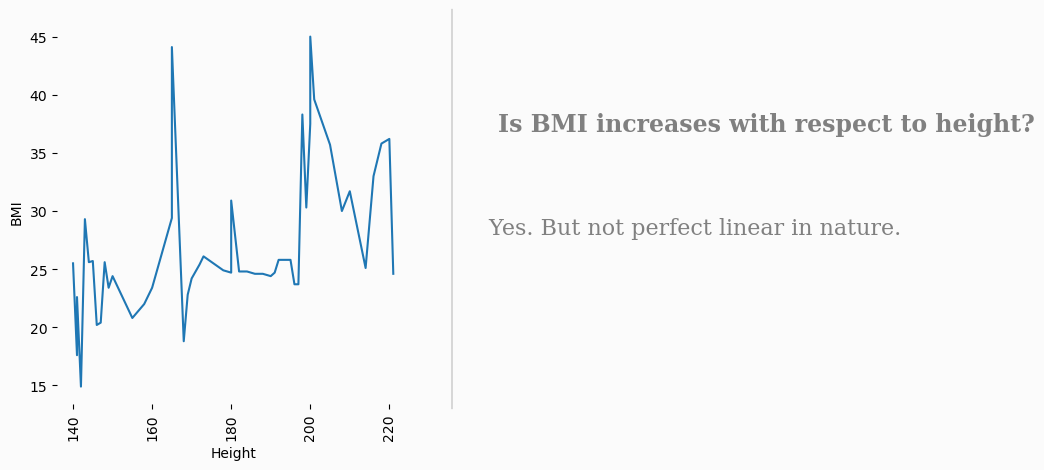

In [19]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.lineplot(data=df_input, x = 'Height', y='BMI',estimator=None,ax=ax0)

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Is BMI increases with respect to height?
        ''')
#text content
fig.text(x=0.5,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Yes. But not perfect linear in nature.
        ''')
plt.show()

### 3. Weight and BMI

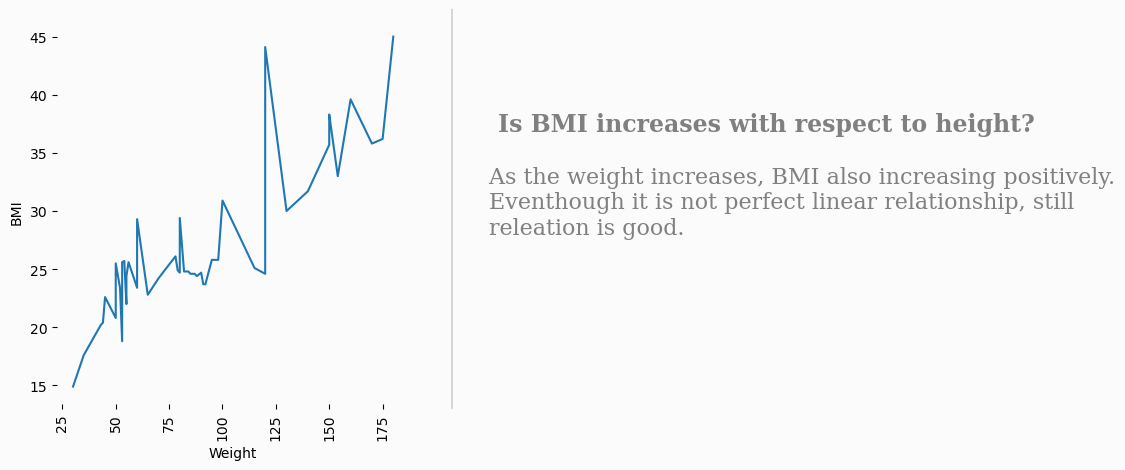

In [20]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.lineplot(data=df_input, x = 'Weight', y='BMI',estimator=None,ax=ax0)

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Is BMI increases with respect to height?
        ''')
#text content
fig.text(x=0.5,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        As the weight increases, BMI also increasing positively.
        Eventhough it is not perfect linear relationship, still
        releation is good.
        ''')
plt.show()

### 4. Correlation of features with BMI

In [21]:
correlation_matrix=df_input.corr()['BMI']
correlation_matrix=correlation_matrix.to_frame()
correlation_matrix.sort_values(by='BMI',ascending=False,inplace=True)

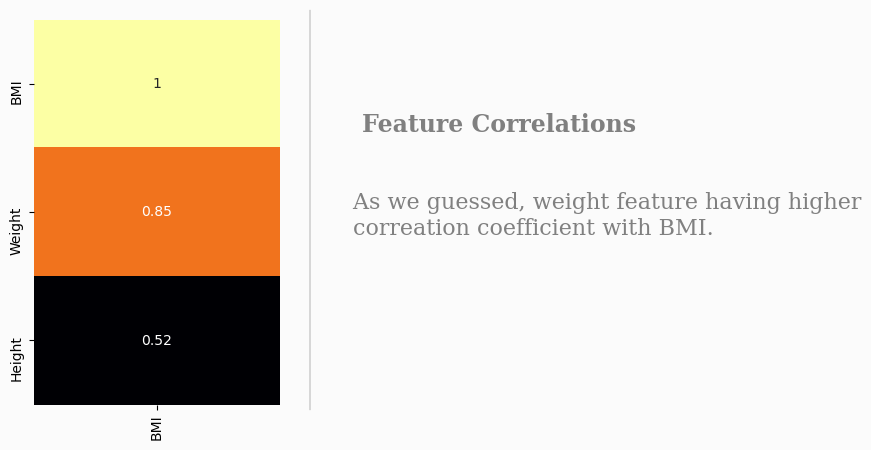

In [23]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(7,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
#plt.figure(figsize=(1,3));
sns.heatmap(correlation_matrix,cmap='inferno',annot=True,ax=ax0,cbar=False);

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Feature Correlations
        ''')
#text content
fig.text(x=0.5,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        As we guessed, weight feature having higher
        correation coefficient with BMI.
        ''')
plt.show()

## Model Training
Find the best model for the data and train the model with available data.

In [36]:
# Function for providing generalized results for regression model
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. regression model eg: LinearRegression(),LassoRegression() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name=model.__class__.__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training score: {train_score}\nTesting score: {test_score}")
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    df=pd.DataFrame({"Actual": y_test,
                     "Predicted":y_pred})
    
    #Apply inverse box cox to retrieve original target results
    # df=inv_boxcox(df,box_cox_param)
    
    #Finding the difference between original and predicted
    df["difference"]=df.Predicted-df.Actual
    df.reset_index(inplace=True)
    
    #Plot actual vs predicted
    plt.figure(figsize=(10,5));
    sns.scatterplot(data=df,x="index",y="Actual",color='grey',label=["Actual"]).set_facecolor(background_color);
    sns.lineplot(data=df,x="index",y="Predicted",color='salmon',label=["Predicted"]);
    plt.legend(loc="right",bbox_to_anchor=(1.1,1));
    plt.title(model_name+" -Actual vs Predicted");
    plt.show()
    
    print ("Sample comparison file for actual and predicted target feature:")
    display(df.head())
    
    # Return the model for re-use if required.
    return model

In [25]:
#General data frame and function for storing and comparing model results.
df_model_results=pd.DataFrame(columns=["ModelName","TrainScore"])

def store_model_results(modl_name,train_score):
    global df_model_results
    row_loc=df_model_results.shape[0]+1
    df_model_results.loc[row_loc,["ModelName","TrainScore"]]=[modl_name,train_score]

In [26]:
#Run each model and show the combined results.
def show_model_scores(x,y):
    global df_model_results
    df_model_results=df_model_results.iloc[0:0] #reset display dataframe
    for model in  [LinearRegression(),
                   Lasso(),
                   Ridge(),
                   ElasticNet(),
                   XGBRegressor()]:
        store_model_results(model.__class__.__name__, cross_val_score(model,x,y,cv=3).mean())
    df_model_results.sort_values("TrainScore",ascending=False,inplace=True)
    display(df_model_results)
    display(HTML('Selected model : <b>' + df_model_results.head(1)['ModelName'].values[0] + '</b>'))
    

In [27]:
# Set dependent and independent features.
y=df_input.BMI
x=df_input.drop('BMI',axis=1)

In [28]:
#Set training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [32]:
print (f"X train shape: {x_train.shape}\ny train shape: {y_train.shape}\nX test shape : {x_test.shape}\ny test shape : {y_test.shape}")

X train shape: (35, 2)
y train shape: (35,)
X test shape : (15, 2)
y test shape : (15,)


In [34]:
#Run the models
show_model_scores(x_train, y_train)

,ModelName,TrainScore
1,LinearRegression,0.906457
3,Ridge,0.906454
4,ElasticNet,0.905788
2,Lasso,0.904909
5,XGBRegressor,0.639306


Training score: 0.9217702103899712
Testing score: 0.9303105072379999
Prediction completed.


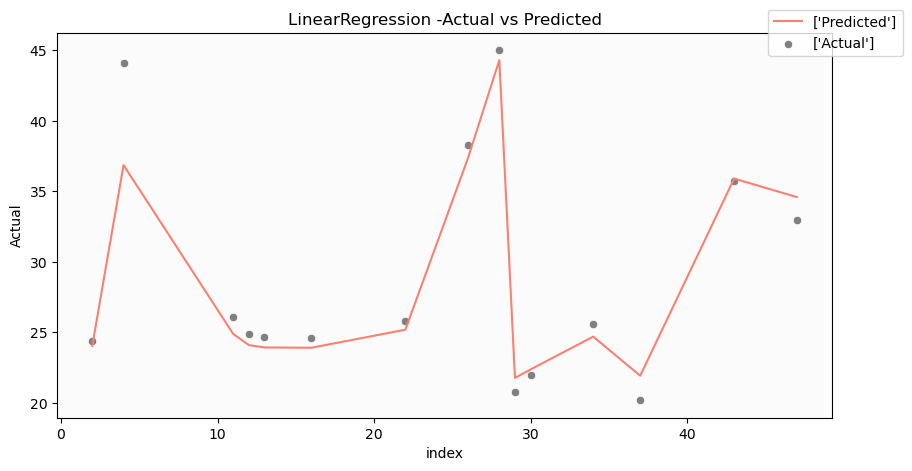

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,4,44.1,36.861045,-7.238955
1,12,24.9,24.109352,-0.790648
2,43,35.7,35.902685,0.202685
3,13,24.7,23.938870,-0.761130
4,16,24.6,23.917680,-0.682320


LinearRegression()

In [37]:
evaluate_model(LinearRegression(),x_train,y_train,x_test,y_test)

### Summary
Linear Regression fits well for this dataset.